In [1]:
from scipy.stats import sem
from scipy.stats import t
import numpy as np
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
attendance_data_with_rain_data = pd.read_csv("processed_data/seasons_2012-2018_attendance_data.csv")

In [3]:
attendance_data_with_rain_data = attendance_data_with_rain_data[attendance_data_with_rain_data["attendance_percentage"] <= 1.25]
attendance_data_with_rain_data

,Unnamed: 0,attendance,away_conference,away_line_scores,away_points,away_team,conference_game,home_conference,home_line_scores,home_points,...,name,state,year_constructed,zip,attendance_percentage,home_team_ranked_ind,away_team_ranked_ind,rain,max_temp,min_temp
0,0,38393.0,SEC,"[7, 3, 0, 7]",17,South Carolina,True,SEC,"[0, 10, 3, 0]",13,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.951499,0,1,0.0,NaN,NaN
1,1,35491.0,NaN,"[0, 0, 0, 0]",0,Presbyterian College,False,SEC,"[10, 17, 28, 3]",58,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.879579,0,0,0.0,NaN,NaN
2,2,40350.0,SEC,"[0, 11, 7, 13]",31,Florida,True,SEC,"[7, 0, 0, 10]",17,...,Vanderbilt Stadium,TN,1922.0,37212.0,1.000000,0,1,5.0,NaN,NaN
3,3,40350.0,SEC,"[0, 10, 0, 3]",13,Auburn,True,SEC,"[7, 3, 7, 0]",17,...,Vanderbilt Stadium,TN,1922.0,37212.0,1.000000,0,0,0.0,NaN,NaN
4,4,32227.0,Mid-American,"[0, 0, 0, 7]",7,UMass,False,SEC,"[7, 14, 28, 0]",49,...,Vanderbilt Stadium,TN,1922.0,37212.0,0.798686,0,0,38.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4822,4822,13154.0,Sun Belt,"[0, 10, 14, 7]",31,Appalachian State,True,Sun Belt,"[0, 7, 0, 3]",10,...,Georgia State Stadium,GA,2017.0,30315.0,0.540583,0,0,NaN,NaN,NaN
4823,4823,14163.0,Sun Belt,"[7, 7, 3, 7]",24,Idaho,True,Sun Belt,"[7, 3, 0, 0]",10,...,Georgia State Stadium,GA,2017.0,30315.0,0.582049,0,0,NaN,NaN,NaN
4830,4830,76330.0,ACC,"[0, 7, 0, 0]",7,Florida State,False,SEC,"[3, 7, 11, 3]",24,...,Mercedes-Benz Stadium,GA,2017.0,30313.0,1.075070,1,1,NaN,NaN,NaN
4831,4831,75107.0,SEC,"[0, 7, 7, 14, 7, 7]",42,Tennessee,False,ACC,"[7, 7, 7, 7, 7, 6]",41,...,Mercedes-Benz Stadium,GA,2017.0,30313.0,1.057845,0,1,NaN,NaN,NaN


----------------

# What factors influenced attendance rates at College Football games over the 2012 - 2018 seasons?  

## *H1. Larger stadium capacities have higher percentages of attendance than stadiums that accommodate less people.*

If you build it they will come!!

In [4]:
stadiums = attendance_data_with_rain_data["name"].unique()
average_attendance_percentages = []
capacities = []

for stadium in stadiums:
    stadium_rows = attendance_data_with_rain_data[attendance_data_with_rain_data["name"] == stadium]
    average_attendance_percentage = np.mean(stadium_rows["attendance_percentage"])
    capacity = np.mean(stadium_rows["capacity"])
    capacities.append(capacity)
    average_attendance_percentages.append(average_attendance_percentage) 
    
average_attendance_data = pd.DataFrame()
average_attendance_data["name"] = stadiums
average_attendance_data["capacity"] = capacities
average_attendance_data["average_attendance_percentage"] = average_attendance_percentages

In [5]:
largest_stadiums = average_attendance_data.nlargest(5, "capacity")
largest_stadiums[["name", "capacity", "average_attendance_percentage"]]

,name,capacity,average_attendance_percentage
155,Bristol Motor Speedway,162000.0,0.969074
77,Michigan Stadium,107601.0,1.023081
26,Beaver Stadium,106572.0,0.942074
20,Ohio Stadium,104944.0,1.012530
78,Kyle Field,102733.0,0.943094


In [6]:
smallest_stadiums = average_attendance_data.nsmallest(5, "capacity")
smallest_stadiums[["name", "capacity", "average_attendance_percentage"]]

,name,capacity,average_attendance_percentage
146,Jerry Richardson Stadium,15314.0,0.861254
11,Kibbie Dome,16000.0,0.762361
137,Warren McGuirk Alumni Stadium,17000.0,0.694376
121,Foreman Field,20118.0,1.000112
54,Houchens Industries-L. T. Smith Stadium,22113.0,0.778348


------------------------
## *H2. The higher the quality of the home team for the game week, the higher the percentage of attendance.*

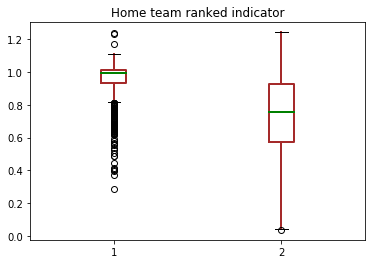

In [7]:
home_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 1]["attendance_percentage"]
home_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["home_team_ranked_ind"] == 0]["attendance_percentage"]

data = [home_team_ranked, home_team_unranked]
fig, ax = plt.subplots()
ax.set_title("Home Team")
bp = ax.boxplot(data)

# change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="brown", linewidth=2)

# change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="brown", linewidth=2)

# change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.title("Home team ranked indicator")
    
plt.show()

In [8]:
from scipy.stats import ttest_ind

t, p = ttest_ind(home_team_ranked, home_team_unranked, equal_var=False)

In [9]:
t

44.229968590611314

In [10]:
p

0.0

--------------------
## *H3. The higher the quality of the away team for the game week, the higher the percentage of attendance.*

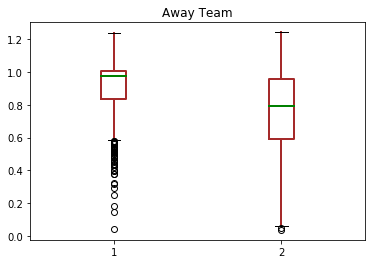

In [11]:
away_team_ranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 1]["attendance_percentage"]
away_team_unranked = attendance_data_with_rain_data[attendance_data_with_rain_data["away_team_ranked_ind"] == 0]["attendance_percentage"]

data = [away_team_ranked, away_team_unranked]
fig, ax = plt.subplots()
ax.set_title("Away Team")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="brown", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="brown", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.show()

In [12]:
t, p = ttest_ind(away_team_ranked, away_team_unranked, equal_var=False)

In [13]:
t

21.350051855612122

In [14]:
p

7.904205655286066e-88

---------------------
## *H4. Conference matchups have higher percentages of attendance than non-conference games.*

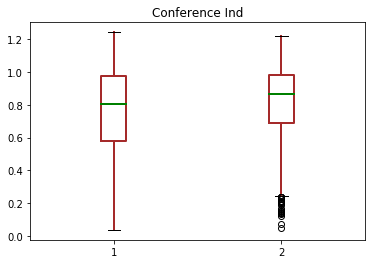

In [15]:
conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"]]["attendance_percentage"]
non_conference_matchups = attendance_data_with_rain_data[attendance_data_with_rain_data["conference_game"] == False]["attendance_percentage"]

data = [conference_matchups, non_conference_matchups]
fig, ax = plt.subplots()
ax.set_title("Conference Ind")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="brown", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="brown", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.show()

In [16]:
t, p = ttest_ind(conference_matchups, non_conference_matchups, equal_var=False)

In [17]:
t

-8.475536047227644

In [18]:
p

3.167357532717905e-17

--------------------------
## *H5. Games with a temperate kickoff temperature will have higher percentages of attendance than those with extremely high or extremely low temperatures.*

In [19]:
attendance_data_with_rain_data["max_temp"] = ((attendance_data_with_rain_data["max_temp"] / 10.0) * (9.0/5.0)) + 32
attendance_data_with_rain_data["min_temp"] = ((attendance_data_with_rain_data["min_temp"] / 10.0) * (9.0/5.0)) + 32

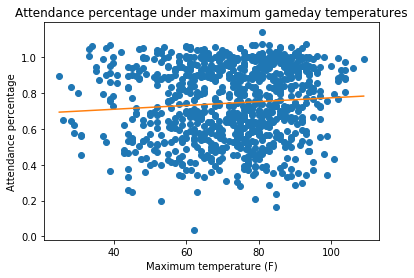

In [36]:
max_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["max_temp"] >= 0]

plt.plot(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], "o")
plt.plot(np.unique(max_temp_attendance["max_temp"]), np.poly1d(np.polyfit(max_temp_attendance["max_temp"], max_temp_attendance["attendance_percentage"], 1))(np.unique(max_temp_attendance["max_temp"])))

plt.title("Attendance percentage under maximum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Maximum temperature (F)")
plt.show()

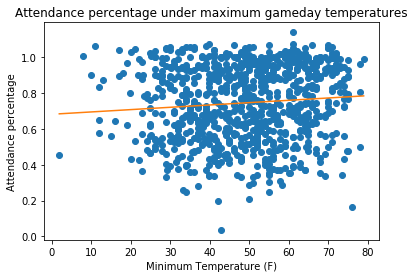

In [33]:
min_temp_attendance = attendance_data_with_rain_data[attendance_data_with_rain_data["min_temp"] >= 0]

plt.plot(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], "o")
plt.plot(np.unique(min_temp_attendance["min_temp"]), np.poly1d(np.polyfit(min_temp_attendance["min_temp"], min_temp_attendance["attendance_percentage"], 1))(np.unique(min_temp_attendance["min_temp"])))

plt.title("Attendance percentage under maximum gameday temperatures")
plt.ylabel("Attendance percentage")
plt.xlabel("Minimum Temperature (F)")
plt.show()

-----------------------
## H6. *Games without rain will have higher percentages of attendance than those with rain.*

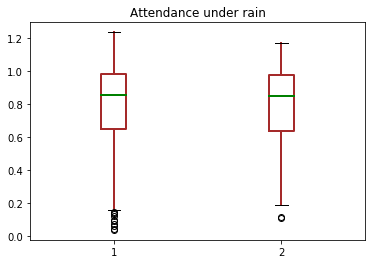

In [22]:
attendance_with_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] == 0]["attendance_percentage"]
attendance_without_rain = attendance_data_with_rain_data[attendance_data_with_rain_data["rain"] > 0]["attendance_percentage"]

data = [attendance_with_rain, attendance_without_rain]
fig, ax = plt.subplots()
ax.set_title("Attendance under rain")
bp = ax.boxplot(data)

## change outline color, fill color and linewidth of the boxes
for box in bp["boxes"]:
    # change outline color
    box.set(color="brown", linewidth=2)

## change color and linewidth of the whiskers
for whisker in bp["whiskers"]:
    whisker.set(color="brown", linewidth=2)

## change color and linewidth of the medians
for median in bp["medians"]:
    median.set(color="green", linewidth=2)

plt.show()

In [23]:
t, p = ttest_ind(attendance_with_rain, attendance_without_rain, equal_var=False)

In [24]:
t

-0.43376332693678626

In [25]:
p

0.6645626256757167